In [35]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("hcc_dataset.csv", na_values='?') #replace '?' with NaN

Analisar a percentagem de missing values de cada atributo e retirar aqueles que têm uma percentagem muito elevada e dificilmente conseguiriamos completar os missing values de forma válida

In [37]:
print(((165 - df.count())/165)*100) #percentagem de valores nulos

Gender             0.000000
Symptoms          10.909091
Alcohol            0.000000
HBsAg             10.303030
HBeAg             23.636364
HBcAb             14.545455
HCVAb              5.454545
Cirrhosis          0.000000
Endemic           23.636364
Smoking           24.848485
Diabetes           1.818182
Obesity            6.060606
Hemochro          13.939394
AHT                1.818182
CRI                1.212121
HIV                8.484848
NASH              13.333333
Varices           31.515152
Spleno             9.090909
PHT                6.666667
PVT                1.818182
Metastasis         2.424242
Hallmark           1.212121
Age                0.000000
Grams_day         29.090909
Packs_year        32.121212
PS                 0.000000
Encephalopathy    86.666667
Ascites           67.272727
INR                2.424242
AFP                4.848485
Hemoglobin         1.818182
MCV                1.818182
Leucocytes         1.818182
Platelets          1.818182
 Albumin           3

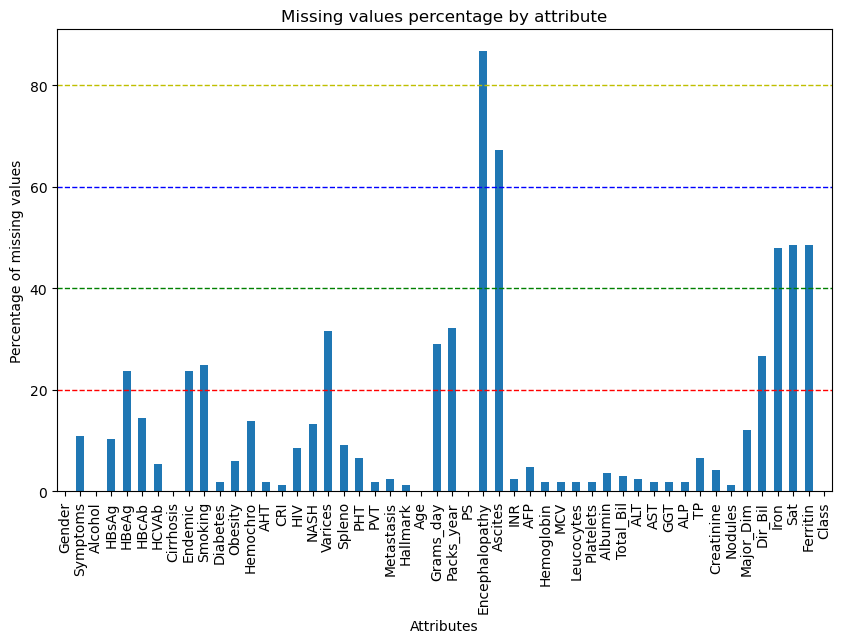

In [38]:
missing_percentages = ((165 - df.count())/165)*100
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar')
plt.title('Missing values percentage by attribute')
plt.xlabel('Attributes')
plt.ylabel('Percentage of missing values')

plt.axhline(y=20, color='r', linestyle='--', linewidth=1)
plt.axhline(y=40, color='g', linestyle='--', linewidth=1)
plt.axhline(y=60, color='b', linestyle='--', linewidth=1)
plt.axhline(y=80, color='y', linestyle='--', linewidth=1)

plt.show()

Eliminamos então os atributos 'Encephalopathy' e 'Ascites'pois a % é superior a 65.

In [39]:
df.drop(columns=['Encephalopathy', 'Ascites'], inplace=True) 

Completar os atributos numéricos usando a mediana 

In [40]:
from sklearn.impute import SimpleImputer

# Define the imputer strategy (e.g., mean, median, most frequent)
imputer = SimpleImputer(strategy='median')

# Impute missing values for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [41]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150.0,7.10,0.70,1.0,3.5,0.5,83.0,27.0,295.0,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,...,162.0,7.05,0.85,1.0,1.8,0.7,83.0,27.0,295.0,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,7.00,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174.0,8.10,1.11,2.0,15.7,0.2,83.0,27.0,295.0,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,6.90,1.80,1.0,9.0,0.7,59.0,15.0,22.0,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,...,109.0,7.60,0.70,5.0,3.0,0.7,83.0,27.0,295.0,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,...,280.0,6.70,0.70,1.0,2.2,2.3,83.0,27.0,295.0,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181.0,7.50,1.46,5.0,18.6,0.7,83.0,27.0,295.0,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170.0,8.40,0.74,5.0,18.0,0.7,83.0,27.0,295.0,Dies


Substituir variáveis de "Yes"/"No" por 1 e 0

In [42]:
df.replace({"Yes": 1, "No": 0, "Female": 1, "Male": 0, "Lives": 1, "Dies": 0}, inplace=True)


/tmp/ipykernel_5310/3873573117.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes": 1, "No": 0, "Female": 1, "Male": 0, "Lives": 1, "Dies": 0}, inplace=True)


In [43]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.10,0.70,1.0,3.5,0.5,83.0,27.0,295.0,1
1,1,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,162.0,7.05,0.85,1.0,1.8,0.7,83.0,27.0,295.0,1
2,0,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,7.00,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,0,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174.0,8.10,1.11,2.0,15.7,0.2,83.0,27.0,295.0,0
4,0,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,6.90,1.80,1.0,9.0,0.7,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,...,109.0,7.60,0.70,5.0,3.0,0.7,83.0,27.0,295.0,1
161,1,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,...,280.0,6.70,0.70,1.0,2.2,2.3,83.0,27.0,295.0,0
162,0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,181.0,7.50,1.46,5.0,18.6,0.7,83.0,27.0,295.0,1
163,0,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,...,170.0,8.40,0.74,5.0,18.0,0.7,83.0,27.0,295.0,0


Preencher os valores ausentes com os valores mais frequentes em cada coluna

In [44]:
df = df.fillna(df.mode().iloc[0])

In [45]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.10,0.70,1.0,3.5,0.5,83.0,27.0,295.0,1
1,1,1.0,0,0.0,0.0,0.0,1.0,1,0.0,1.0,...,162.0,7.05,0.85,1.0,1.8,0.7,83.0,27.0,295.0,1
2,0,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,7.00,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,0,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174.0,8.10,1.11,2.0,15.7,0.2,83.0,27.0,295.0,0
4,0,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,6.90,1.80,1.0,9.0,0.7,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0.0,1,0.0,0.0,0.0,1.0,1,0.0,1.0,...,109.0,7.60,0.70,5.0,3.0,0.7,83.0,27.0,295.0,1
161,1,1.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,...,280.0,6.70,0.70,1.0,2.2,2.3,83.0,27.0,295.0,0
162,0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,181.0,7.50,1.46,5.0,18.6,0.7,83.0,27.0,295.0,1
163,0,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,...,170.0,8.40,0.74,5.0,18.0,0.7,83.0,27.0,295.0,0


Gráficos de cada atributo em relação a quem vive e morre para podermos analisar se retiramos mais alguma variável

<Figure size 800x600 with 0 Axes>

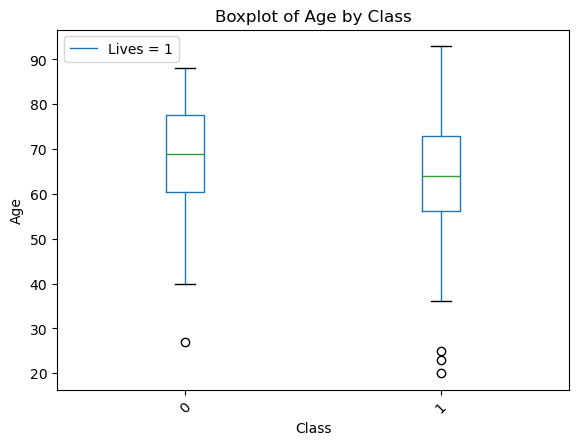

In [46]:
df_filtered = df[df['Age'] != '?']

# Convert Age column to numeric type
df_filtered['Age'] = pd.to_numeric(df_filtered['Age'])

# Plotting
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Age', by='Class', grid=False)
plt.title('Boxplot of Age by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()

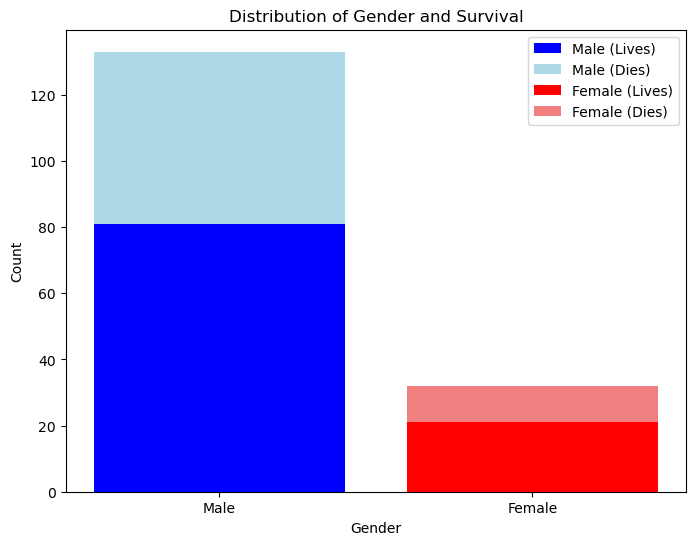

In [47]:
import matplotlib.pyplot as plt

# Count the occurrences of males and females who live or die
male_die = df[(df['Gender'] == 0) & (df['Class'] == 0)]['Gender'].count()
male_live = df[(df['Gender'] == 0) & (df['Class'] == 1)]['Gender'].count()
female_die = df[(df['Gender'] == 1) & (df['Class'] == 0)]['Gender'].count()
female_live = df[(df['Gender'] == 1) & (df['Class'] == 1)]['Gender'].count()

# Plotting a stacked bar chart
plt.figure(figsize=(8, 6))
bars1 = plt.bar(['Male'], [male_live], color='blue', label='Male (Lives)')
bars2 = plt.bar(['Male'], [male_die], bottom=[male_live], color='lightblue', label='Male (Dies)')
bars3 = plt.bar(['Female'], [female_live], color='red', label='Female (Lives)')
bars4 = plt.bar(['Female'], [female_die], bottom=[female_live], color='lightcoral', label='Female (Dies)')


plt.title('Distribution of Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=0)
plt.show()


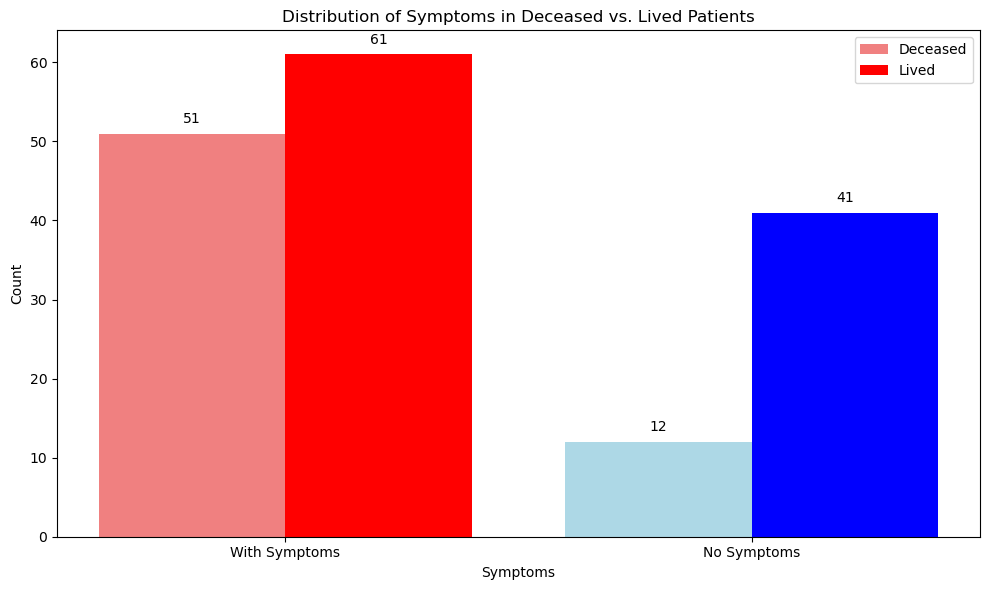

In [48]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without symptoms
symptoms_die = df[(df['Symptoms'] == 1) & (df['Class'] == 0)]['Symptoms'].count()
no_symptoms_die = df[(df['Symptoms'] == 0) & (df['Class'] == 0)]['Symptoms'].count()
symptoms_live = df[(df['Symptoms'] == 1) & (df['Class'] == 1)]['Symptoms'].count()
no_symptoms_live = df[(df['Symptoms'] == 0) & (df['Class'] == 1)]['Symptoms'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [symptoms_die, no_symptoms_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [symptoms_live, no_symptoms_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Symptoms in Deceased vs. Lived Patients')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['With Symptoms', 'No Symptoms'])
plt.legend()
plt.tight_layout()
plt.show()



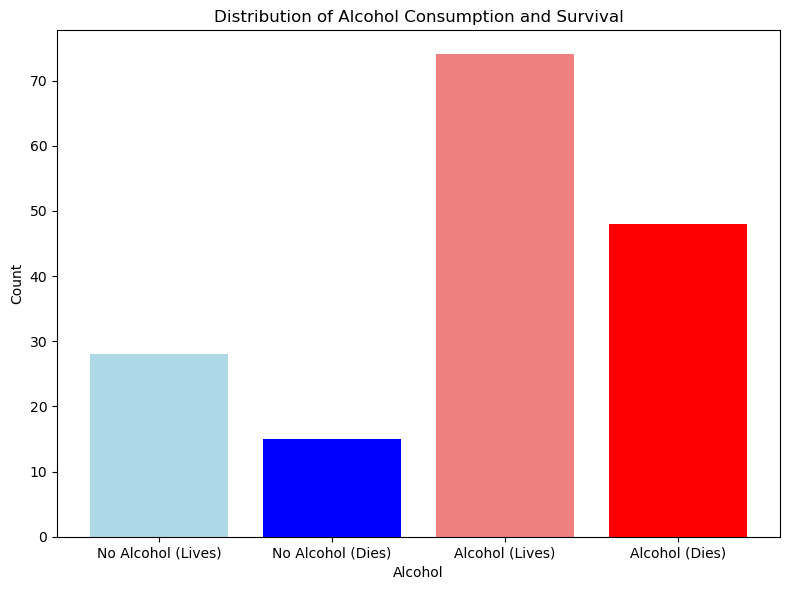

In [49]:
import matplotlib.pyplot as plt

# Count the occurrences of males and females who live or die
no_alcohol_die = df[(df['Alcohol'] == 0) & (df['Class'] == 0)]['Alcohol'].count()
no_alcohol_live = df[(df['Alcohol'] == 0) & (df['Class'] == 1)]['Alcohol'].count()
alcohol_die = df[(df['Alcohol'] == 1) & (df['Class'] == 0)]['Alcohol'].count()
alcohol_live = df[(df['Alcohol'] == 1) & (df['Class'] == 1)]['Alcohol'].count()

# Plotting a stacked bar chart
plt.figure(figsize=(8, 6))
bars1 = plt.bar(['No Alcohol (Lives)'], [no_alcohol_live], color='lightblue')
bars2 = plt.bar(['No Alcohol (Dies)'], [no_alcohol_die], color='blue')
bars3 = plt.bar(['Alcohol (Lives)'], [alcohol_live], color='lightcoral')
bars4 = plt.bar(['Alcohol (Dies)'], [alcohol_die], color='red')
    
plt.title('Distribution of Alcohol Consumption and Survival')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


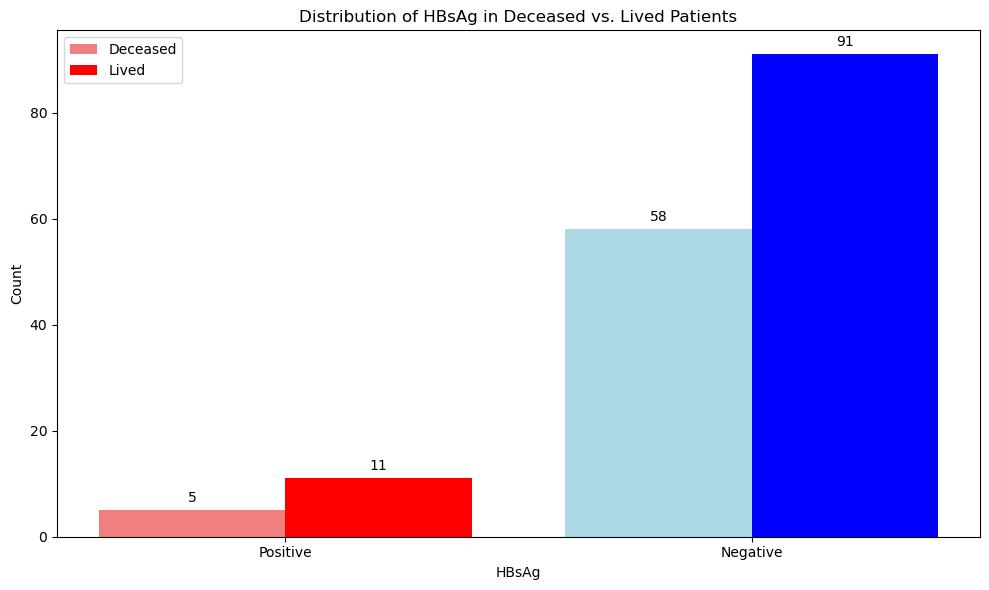

In [50]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without HBsAg
hbsag_die = df[(df['HBsAg'] == 1) & (df['Class'] == 0)]['HBsAg'].count()
no_hbsag_die = df[(df['HBsAg'] == 0) & (df['Class'] == 0)]['HBsAg'].count()
hbsag_live = df[(df['HBsAg'] == 1) & (df['Class'] == 1)]['HBsAg'].count()
no_hbsag_live = df[(df['HBsAg'] == 0) & (df['Class'] == 1)]['HBsAg'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hbsag_die, no_hbsag_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hbsag_live, no_hbsag_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HBsAg in Deceased vs. Lived Patients')
plt.xlabel('HBsAg')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


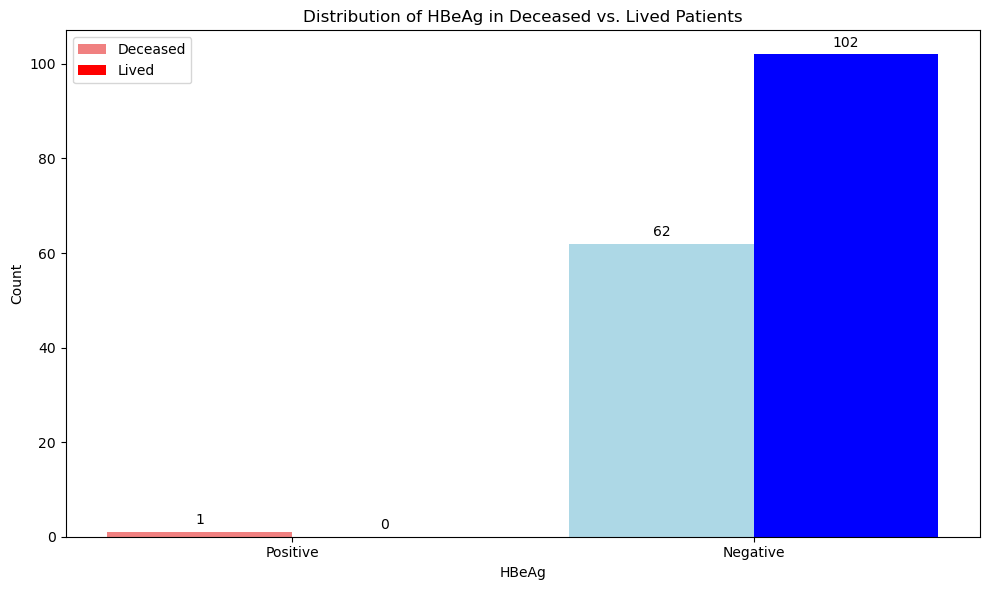

In [51]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without HBeAg
hbeag_die = df[(df['HBeAg'] == 1) & (df['Class'] == 0)]['HBeAg'].count()
no_hbeag_die = df[(df['HBeAg'] == 0) & (df['Class'] == 0)]['HBeAg'].count()
hbeag_live = df[(df['HBeAg'] == 1) & (df['Class'] == 1)]['HBeAg'].count()
no_hbeag_live = df[(df['HBeAg'] == 0) & (df['Class'] == 1)]['HBeAg'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hbeag_die, no_hbeag_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hbeag_live, no_hbeag_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HBeAg in Deceased vs. Lived Patients')
plt.xlabel('HBeAg')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


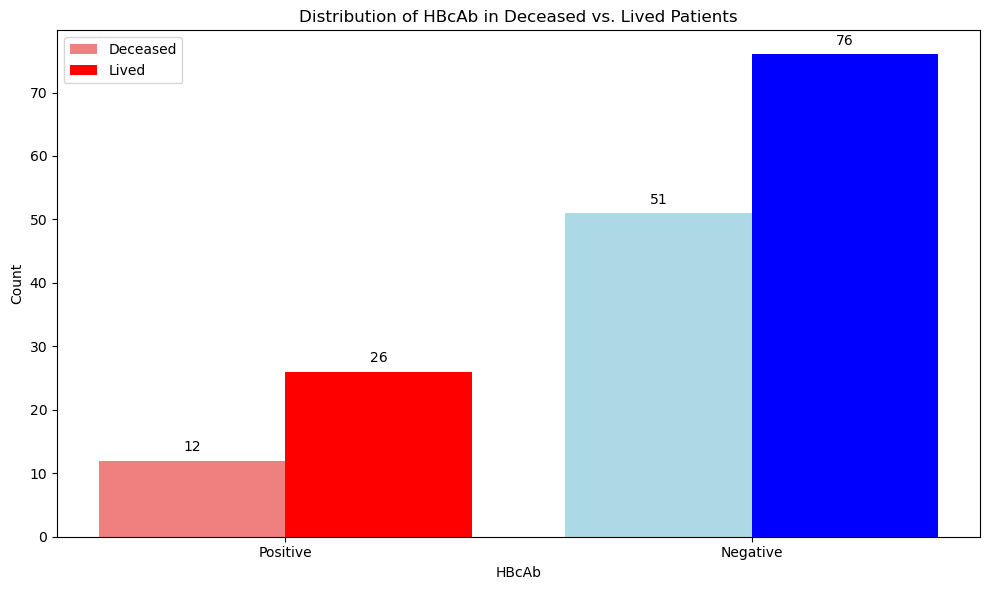

In [52]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without HBcAb
hbcab_die = df[(df['HBcAb'] == 1) & (df['Class'] == 0)]['HBcAb'].count()
no_hbcab_die = df[(df['HBcAb'] == 0) & (df['Class'] == 0)]['HBcAb'].count()
hbcab_live = df[(df['HBcAb'] == 1) & (df['Class'] == 1)]['HBcAb'].count()
no_hbcab_live = df[(df['HBcAb'] == 0) & (df['Class'] == 1)]['HBcAb'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hbcab_die, no_hbcab_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hbcab_live, no_hbcab_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HBcAb in Deceased vs. Lived Patients')
plt.xlabel('HBcAb')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


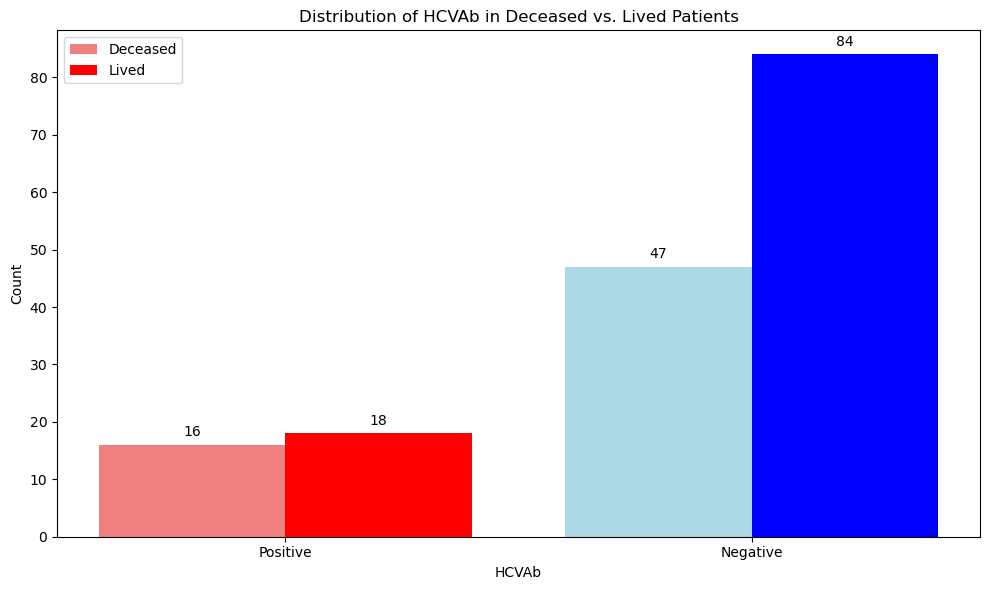

In [53]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without HCVAb
hcvab_die = df[(df['HCVAb'] == 1) & (df['Class'] == 0)]['HCVAb'].count()
no_hcvab_die = df[(df['HCVAb'] == 0) & (df['Class'] == 0)]['HCVAb'].count()
hcvab_live = df[(df['HCVAb'] == 1) & (df['Class'] == 1)]['HCVAb'].count()
no_hcvab_live = df[(df['HCVAb'] == 0) & (df['Class'] == 1)]['HCVAb'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hcvab_die, no_hcvab_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hcvab_live, no_hcvab_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HCVAb in Deceased vs. Lived Patients')
plt.xlabel('HCVAb')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


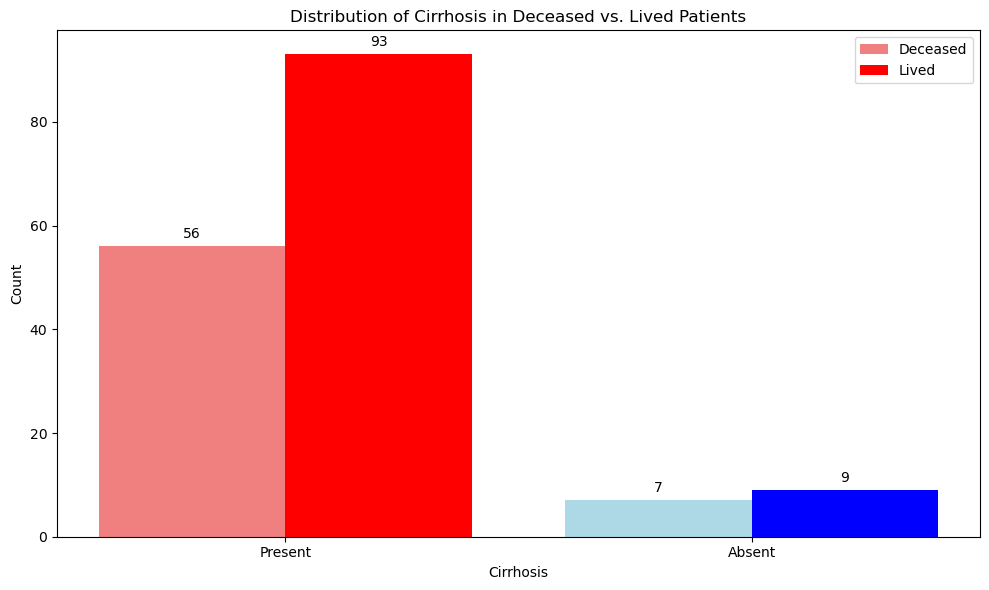

In [54]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Cirrhosis
cirrhosis_die = df[(df['Cirrhosis'] == 1) & (df['Class'] == 0)]['Cirrhosis'].count()
no_cirrhosis_die = df[(df['Cirrhosis'] == 0) & (df['Class'] == 0)]['Cirrhosis'].count()
cirrhosis_live = df[(df['Cirrhosis'] == 1) & (df['Class'] == 1)]['Cirrhosis'].count()
no_cirrhosis_live = df[(df['Cirrhosis'] == 0) & (df['Class'] == 1)]['Cirrhosis'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [cirrhosis_die, no_cirrhosis_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [cirrhosis_live, no_cirrhosis_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Cirrhosis in Deceased vs. Lived Patients')
plt.xlabel('Cirrhosis')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


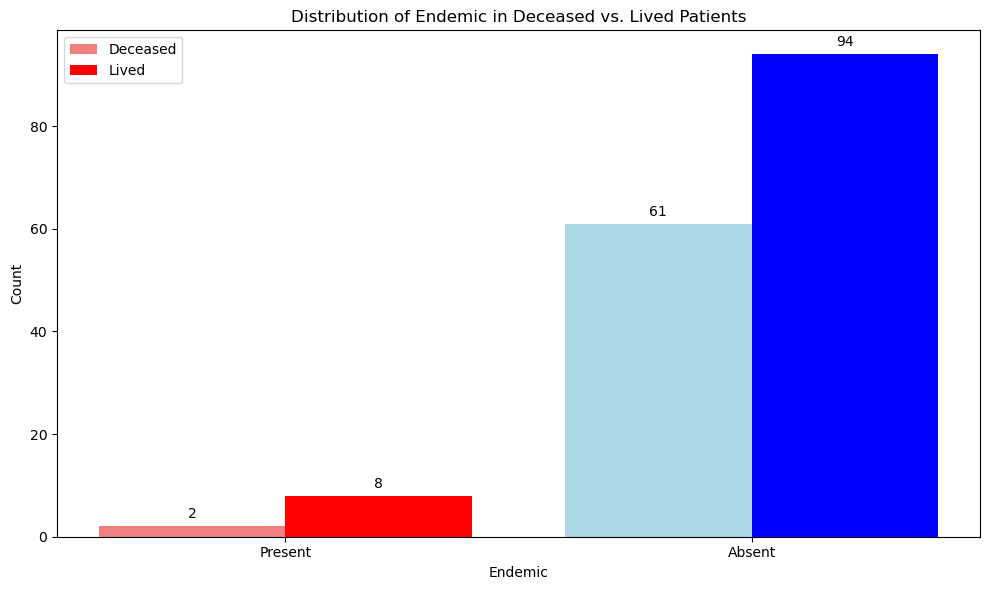

In [55]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Endemic
endemic_die = df[(df['Endemic'] == 1) & (df['Class'] == 0)]['Endemic'].count()
no_endemic_die = df[(df['Endemic'] == 0) & (df['Class'] == 0)]['Endemic'].count()
endemic_live = df[(df['Endemic'] == 1) & (df['Class'] == 1)]['Endemic'].count()
no_endemic_live = df[(df['Endemic'] == 0) & (df['Class'] == 1)]['Endemic'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [endemic_die, no_endemic_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [endemic_live, no_endemic_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Endemic in Deceased vs. Lived Patients')
plt.xlabel('Endemic')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


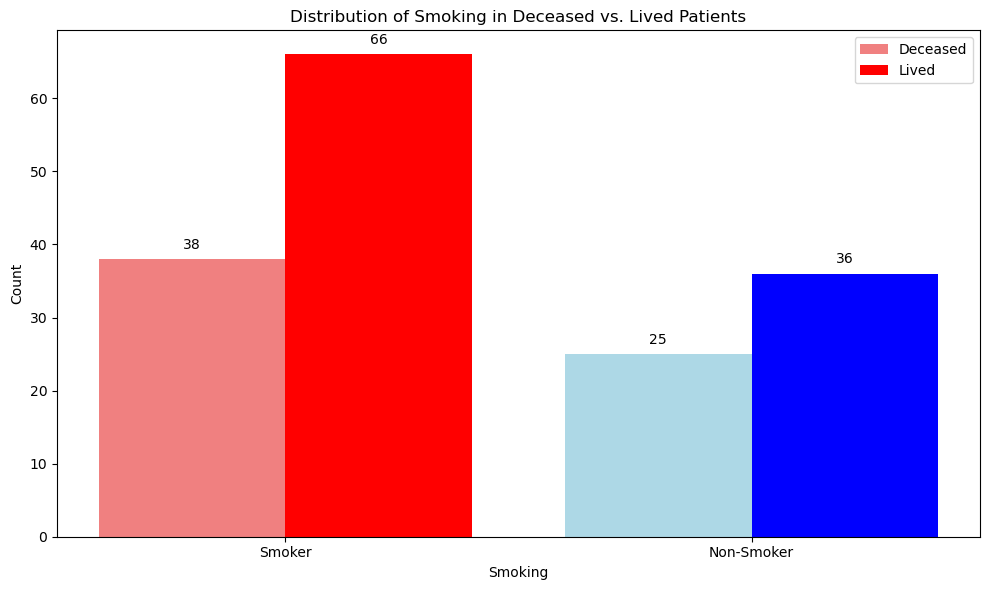

In [56]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Smoking
smoking_die = df[(df['Smoking'] == 1) & (df['Class'] == 0)]['Smoking'].count()
no_smoking_die = df[(df['Smoking'] == 0) & (df['Class'] == 0)]['Smoking'].count()
smoking_live = df[(df['Smoking'] == 1) & (df['Class'] == 1)]['Smoking'].count()
no_smoking_live = df[(df['Smoking'] == 0) & (df['Class'] == 1)]['Smoking'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [smoking_die, no_smoking_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [smoking_live, no_smoking_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Smoking in Deceased vs. Lived Patients')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Smoker', 'Non-Smoker'])
plt.legend()
plt.tight_layout()
plt.show()


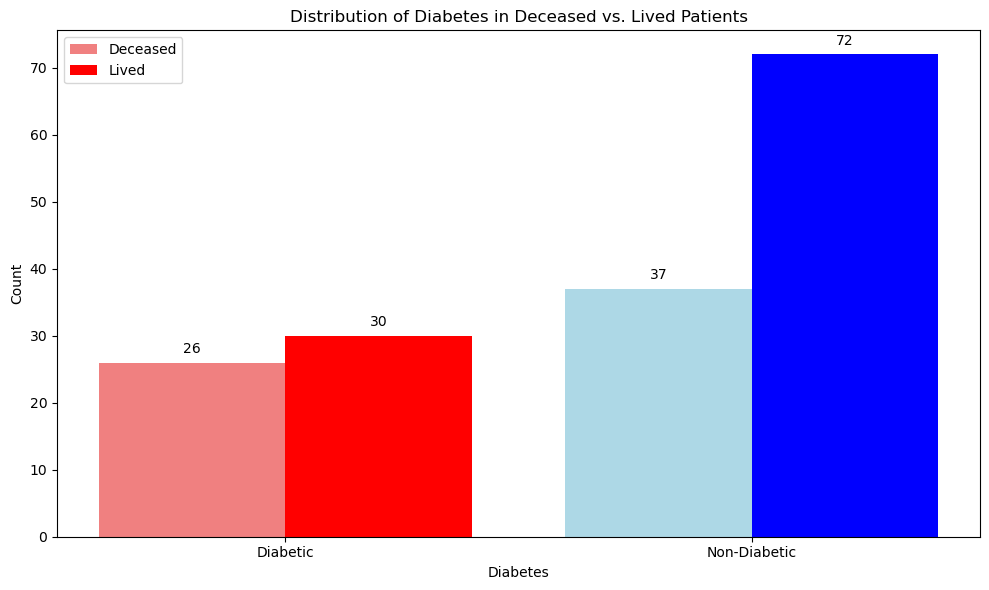

In [57]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Diabetes
diabetes_die = df[(df['Diabetes'] == 1) & (df['Class'] == 0)]['Diabetes'].count()
no_diabetes_die = df[(df['Diabetes'] == 0) & (df['Class'] == 0)]['Diabetes'].count()
diabetes_live = df[(df['Diabetes'] == 1) & (df['Class'] == 1)]['Diabetes'].count()
no_diabetes_live = df[(df['Diabetes'] == 0) & (df['Class'] == 1)]['Diabetes'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [diabetes_die, no_diabetes_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [diabetes_live, no_diabetes_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Diabetes in Deceased vs. Lived Patients')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Diabetic', 'Non-Diabetic'])
plt.legend()
plt.tight_layout()
plt.show()


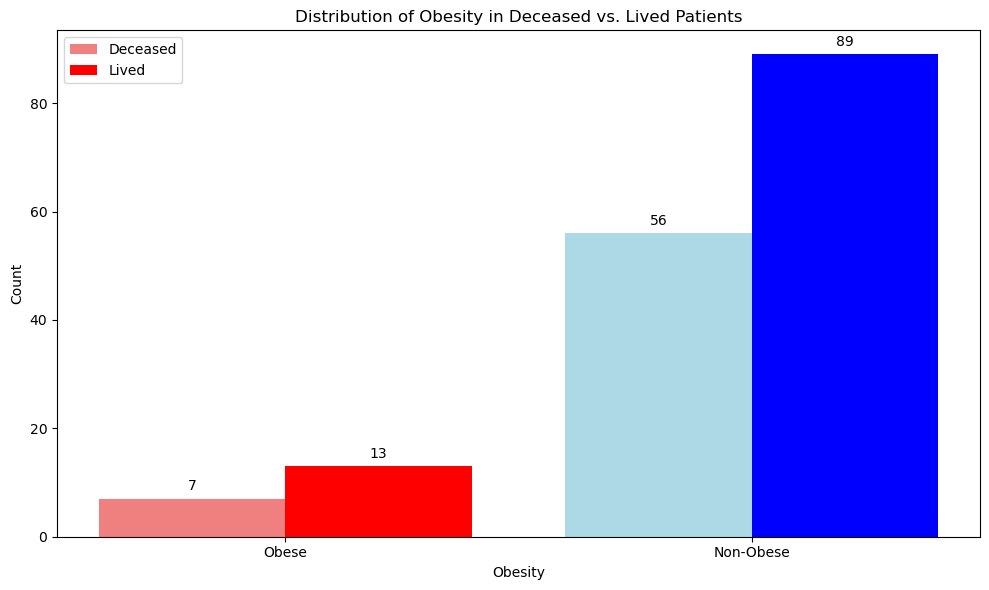

In [58]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Obesity
obesity_die = df[(df['Obesity'] == 1) & (df['Class'] == 0)]['Obesity'].count()
no_obesity_die = df[(df['Obesity'] == 0) & (df['Class'] == 0)]['Obesity'].count()
obesity_live = df[(df['Obesity'] == 1) & (df['Class'] == 1)]['Obesity'].count()
no_obesity_live = df[(df['Obesity'] == 0) & (df['Class'] == 1)]['Obesity'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [obesity_die, no_obesity_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [obesity_live, no_obesity_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Obesity in Deceased vs. Lived Patients')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Obese', 'Non-Obese'])
plt.legend()
plt.tight_layout()
plt.show()


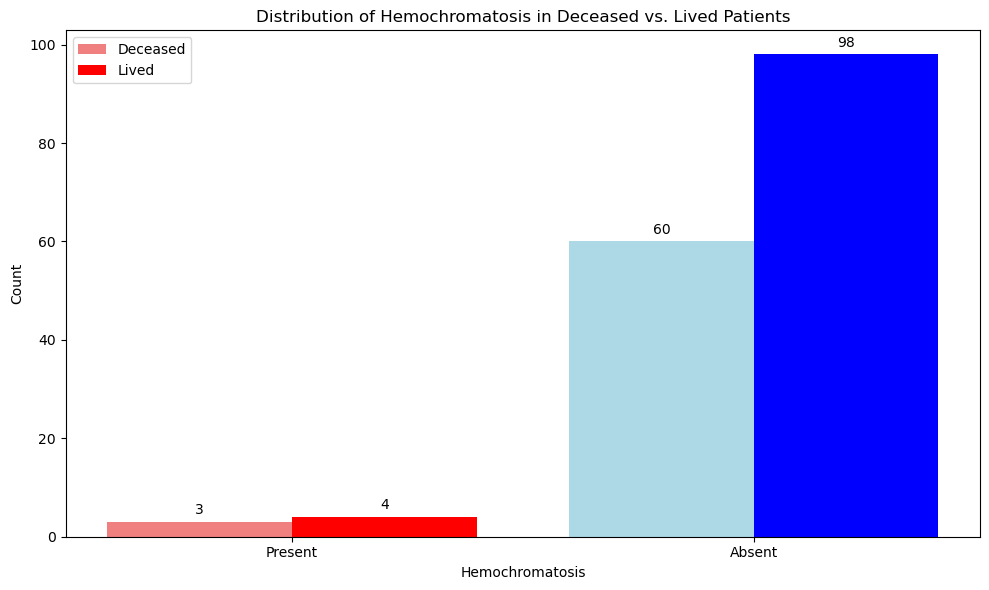

In [59]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Hemochromatosis
hemochro_die = df[(df['Hemochro'] == 1) & (df['Class'] == 0)]['Hemochro'].count()
no_hemochro_die = df[(df['Hemochro'] == 0) & (df['Class'] == 0)]['Hemochro'].count()
hemochro_live = df[(df['Hemochro'] == 1) & (df['Class'] == 1)]['Hemochro'].count()
no_hemochro_live = df[(df['Hemochro'] == 0) & (df['Class'] == 1)]['Hemochro'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hemochro_die, no_hemochro_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hemochro_live, no_hemochro_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Hemochromatosis in Deceased vs. Lived Patients')
plt.xlabel('Hemochromatosis')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


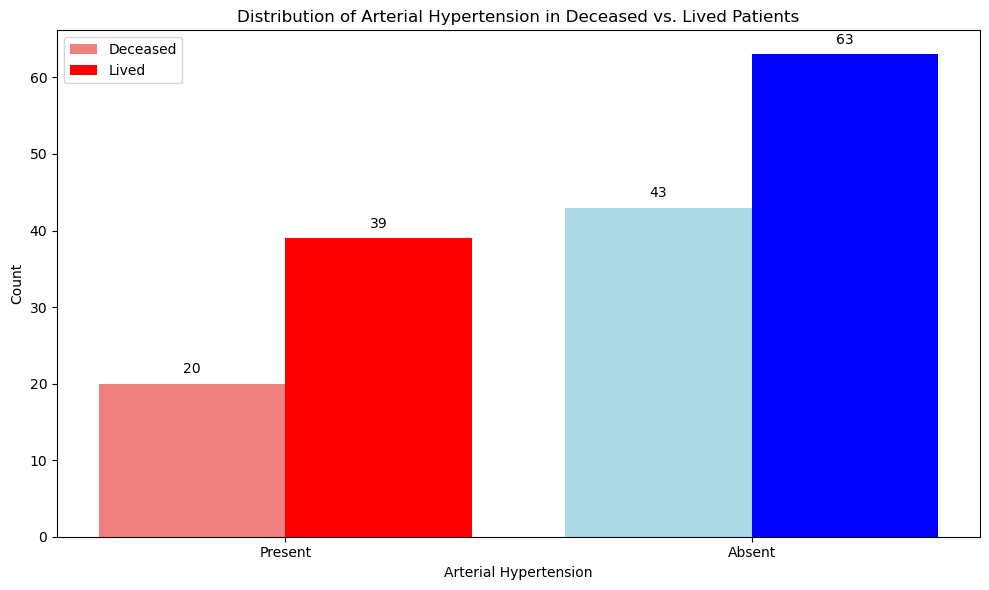

In [60]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Arterial Hypertension
aht_die = df[(df['AHT'] == 1) & (df['Class'] == 0)]['AHT'].count()
no_aht_die = df[(df['AHT'] == 0) & (df['Class'] == 0)]['AHT'].count()
aht_live = df[(df['AHT'] == 1) & (df['Class'] == 1)]['AHT'].count()
no_aht_live = df[(df['AHT'] == 0) & (df['Class'] == 1)]['AHT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [aht_die, no_aht_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [aht_live, no_aht_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Arterial Hypertension in Deceased vs. Lived Patients')
plt.xlabel('Arterial Hypertension')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


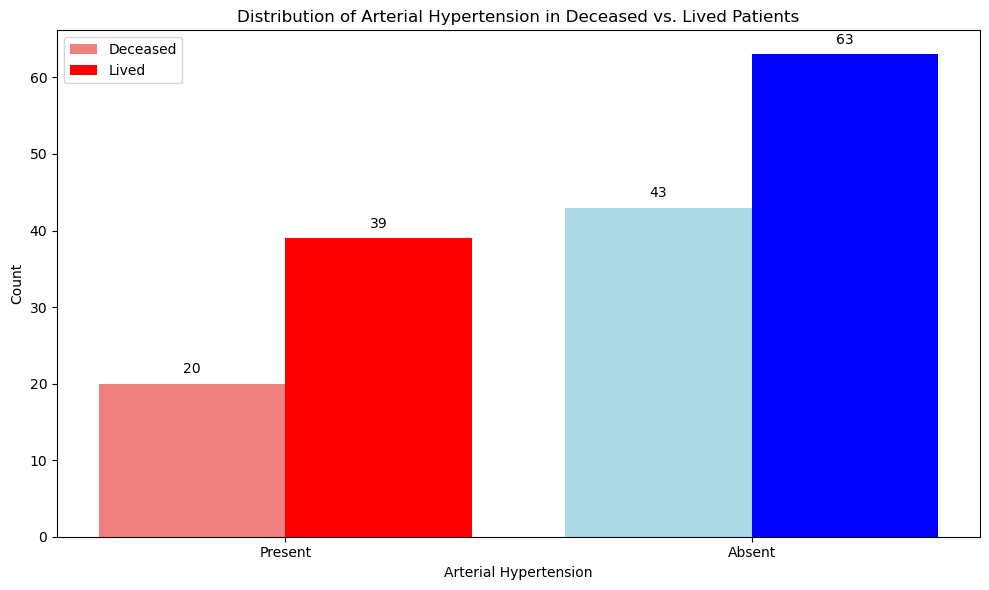

In [61]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Arterial Hypertension
aht_die = df[(df['AHT'] == 1) & (df['Class'] == 0)]['AHT'].count()
no_aht_die = df[(df['AHT'] == 0) & (df['Class'] == 0)]['AHT'].count()
aht_live = df[(df['AHT'] == 1) & (df['Class'] == 1)]['AHT'].count()
no_aht_live = df[(df['AHT'] == 0) & (df['Class'] == 1)]['AHT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [aht_die, no_aht_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [aht_live, no_aht_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Arterial Hypertension in Deceased vs. Lived Patients')
plt.xlabel('Arterial Hypertension')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


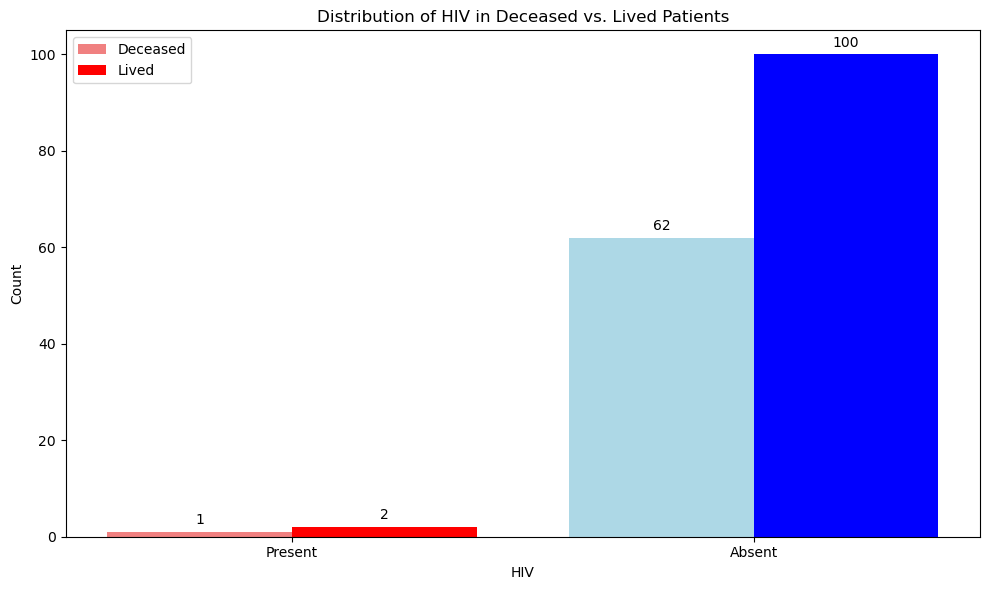

In [62]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without HIV
hiv_die = df[(df['HIV'] == 1) & (df['Class'] == 0)]['HIV'].count()
no_hiv_die = df[(df['HIV'] == 0) & (df['Class'] == 0)]['HIV'].count()
hiv_live = df[(df['HIV'] == 1) & (df['Class'] == 1)]['HIV'].count()
no_hiv_live = df[(df['HIV'] == 0) & (df['Class'] == 1)]['HIV'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hiv_die, no_hiv_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hiv_live, no_hiv_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HIV in Deceased vs. Lived Patients')
plt.xlabel('HIV')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


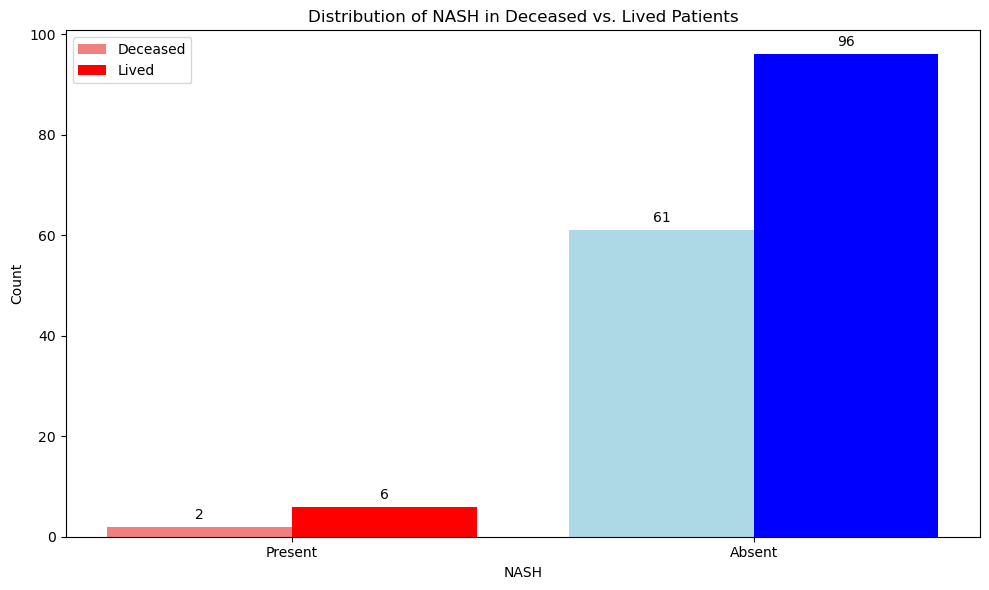

In [63]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without NASH
nash_die = df[(df['NASH'] == 1) & (df['Class'] == 0)]['NASH'].count()
no_nash_die = df[(df['NASH'] == 0) & (df['Class'] == 0)]['NASH'].count()
nash_live = df[(df['NASH'] == 1) & (df['Class'] == 1)]['NASH'].count()
no_nash_live = df[(df['NASH'] == 0) & (df['Class'] == 1)]['NASH'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [nash_die, no_nash_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [nash_live, no_nash_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of NASH in Deceased vs. Lived Patients')
plt.xlabel('NASH')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


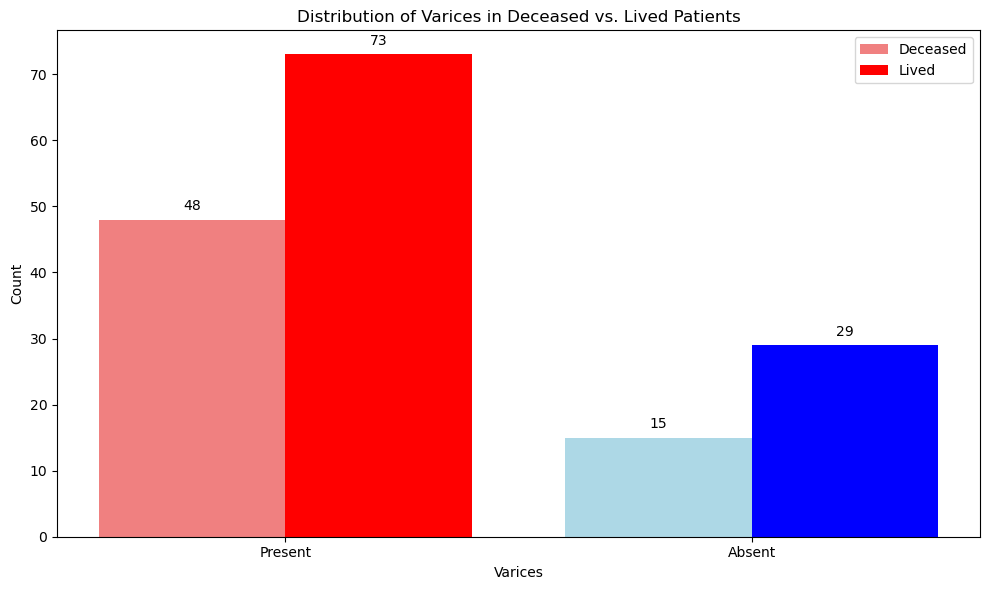

In [64]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Varices
varices_die = df[(df['Varices'] == 1) & (df['Class'] == 0)]['Varices'].count()
no_varices_die = df[(df['Varices'] == 0) & (df['Class'] == 0)]['Varices'].count()
varices_live = df[(df['Varices'] == 1) & (df['Class'] == 1)]['Varices'].count()
no_varices_live = df[(df['Varices'] == 0) & (df['Class'] == 1)]['Varices'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [varices_die, no_varices_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [varices_live, no_varices_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Varices in Deceased vs. Lived Patients')
plt.xlabel('Varices')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


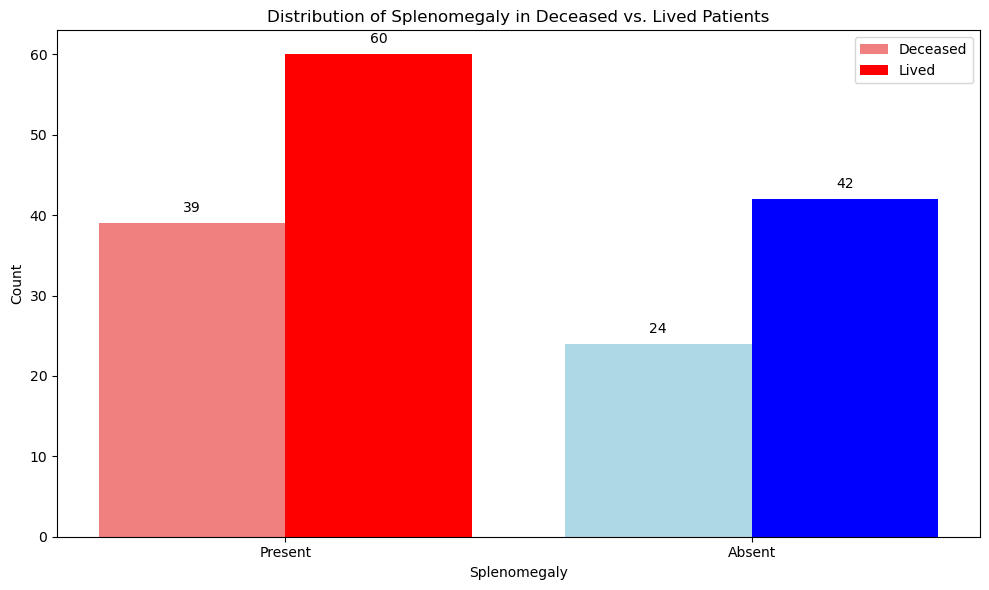

In [65]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Splenomegaly
spleno_die = df[(df['Spleno'] == 1) & (df['Class'] == 0)]['Spleno'].count()
no_spleno_die = df[(df['Spleno'] == 0) & (df['Class'] == 0)]['Spleno'].count()
spleno_live = df[(df['Spleno'] == 1) & (df['Class'] == 1)]['Spleno'].count()
no_spleno_live = df[(df['Spleno'] == 0) & (df['Class'] == 1)]['Spleno'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [spleno_die, no_spleno_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [spleno_live, no_spleno_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Splenomegaly in Deceased vs. Lived Patients')
plt.xlabel('Splenomegaly')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


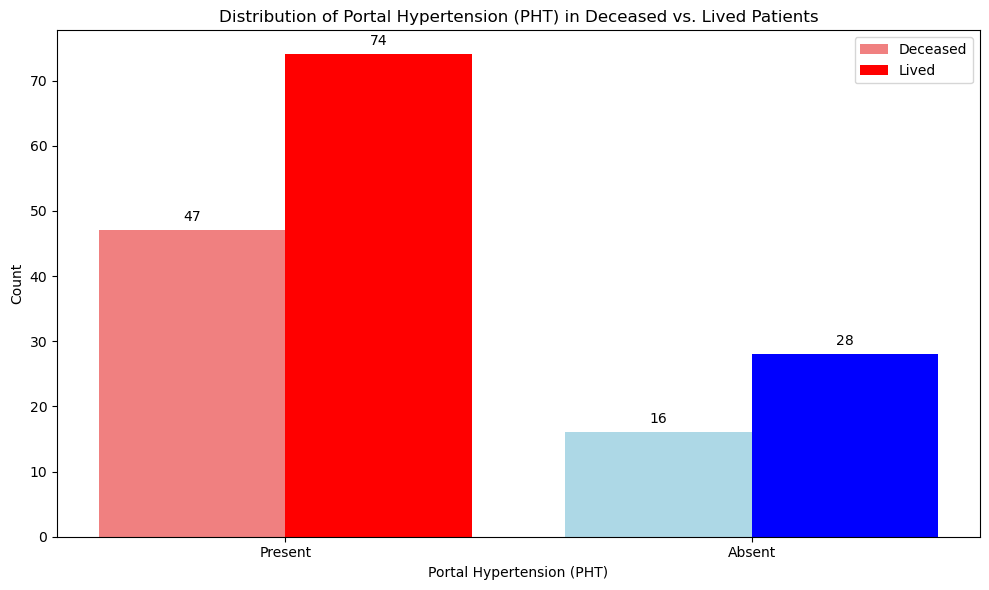

In [66]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Portal Hypertension (PHT)
pht_die = df[(df['PHT'] == 1) & (df['Class'] == 0)]['PHT'].count()
no_pht_die = df[(df['PHT'] == 0) & (df['Class'] == 0)]['PHT'].count()
pht_live = df[(df['PHT'] == 1) & (df['Class'] == 1)]['PHT'].count()
no_pht_live = df[(df['PHT'] == 0) & (df['Class'] == 1)]['PHT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [pht_die, no_pht_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [pht_live, no_pht_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Portal Hypertension (PHT) in Deceased vs. Lived Patients')
plt.xlabel('Portal Hypertension (PHT)')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


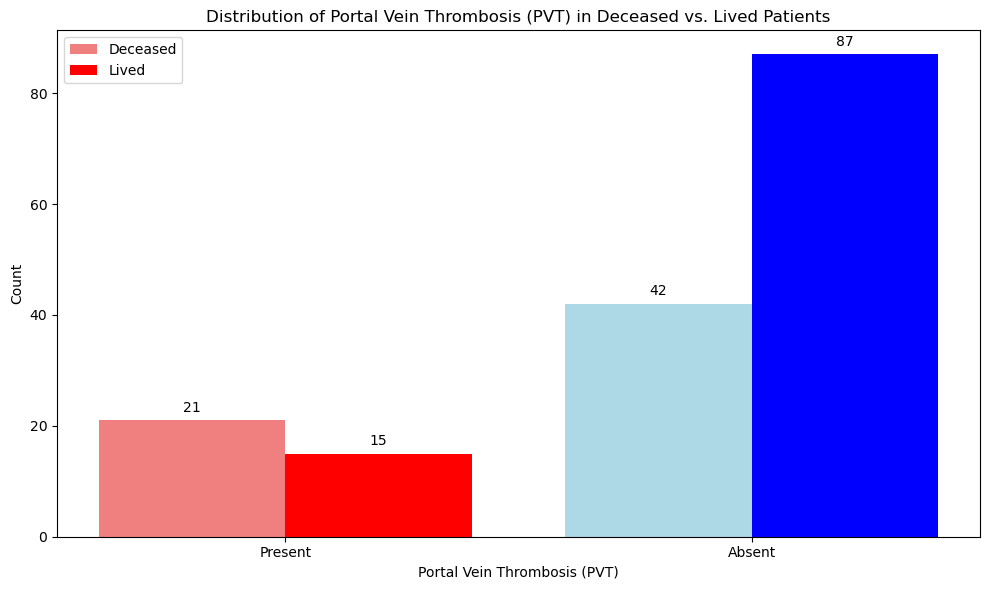

In [67]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Portal Vein Thrombosis (PVT)
pvt_die = df[(df['PVT'] == 1) & (df['Class'] == 0)]['PVT'].count()
no_pvt_die = df[(df['PVT'] == 0) & (df['Class'] == 0)]['PVT'].count()
pvt_live = df[(df['PVT'] == 1) & (df['Class'] == 1)]['PVT'].count()
no_pvt_live = df[(df['PVT'] == 0) & (df['Class'] == 1)]['PVT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [pvt_die, no_pvt_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [pvt_live, no_pvt_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Portal Vein Thrombosis (PVT) in Deceased vs. Lived Patients')
plt.xlabel('Portal Vein Thrombosis (PVT)')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


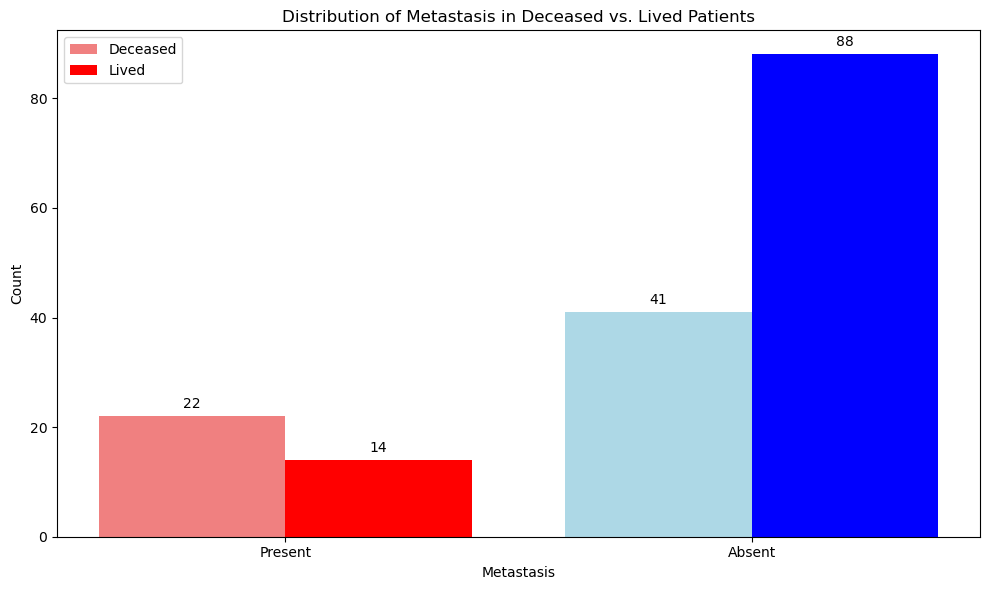

In [68]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Metastasis
meta_die = df[(df['Metastasis'] == 1) & (df['Class'] == 0)]['Metastasis'].count()
no_meta_die = df[(df['Metastasis'] == 0) & (df['Class'] == 0)]['Metastasis'].count()
meta_live = df[(df['Metastasis'] == 1) & (df['Class'] == 1)]['Metastasis'].count()
no_meta_live = df[(df['Metastasis'] == 0) & (df['Class'] == 1)]['Metastasis'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [meta_die, no_meta_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [meta_live, no_meta_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Metastasis in Deceased vs. Lived Patients')
plt.xlabel('Metastasis')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


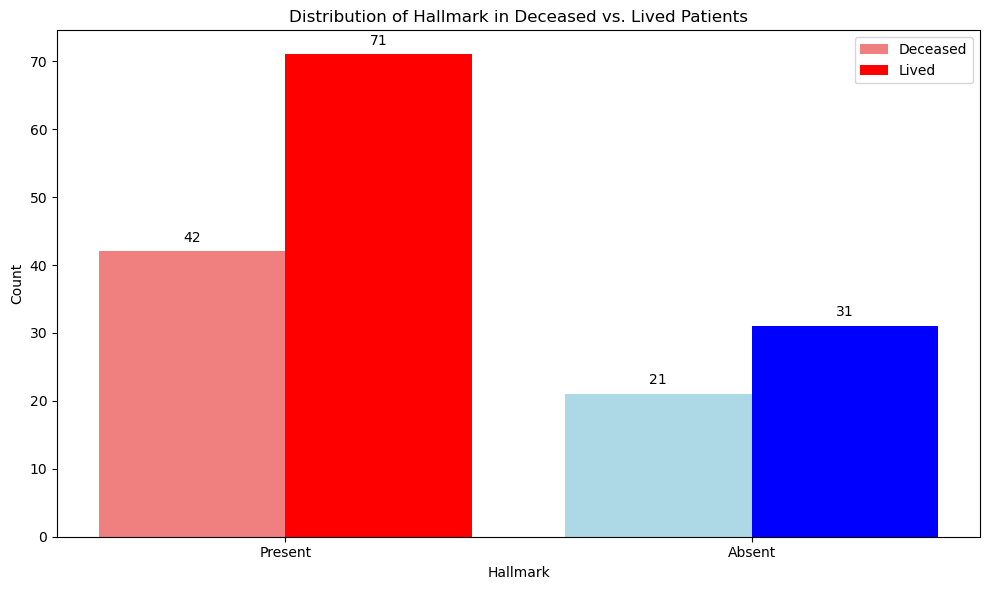

In [69]:
import matplotlib.pyplot as plt

# Count the occurrences of people who die and live with and without Hallmark
hallmark_die = df[(df['Hallmark'] == 1) & (df['Class'] == 0)]['Hallmark'].count()
no_hallmark_die = df[(df['Hallmark'] == 0) & (df['Class'] == 0)]['Hallmark'].count()
hallmark_live = df[(df['Hallmark'] == 1) & (df['Class'] == 1)]['Hallmark'].count()
no_hallmark_live = df[(df['Hallmark'] == 0) & (df['Class'] == 1)]['Hallmark'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hallmark_die, no_hallmark_die], width=0.4, color=['lightcoral', 'lightblue'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hallmark_live, no_hallmark_live], width=0.4, color=['red', 'blue'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Hallmark in Deceased vs. Lived Patients')
plt.xlabel('Hallmark')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

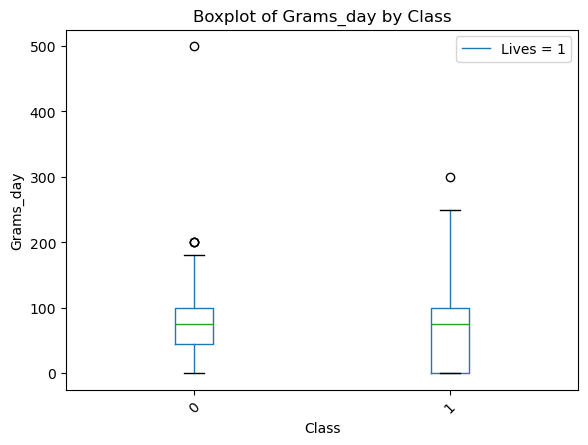

In [70]:
df_filtered = df[df['Grams_day'] != '?']

# Convert Grams_day column to numeric type
df_filtered['Grams_day'] = pd.to_numeric(df_filtered['Grams_day'])

# Plotting
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Grams_day', by='Class', grid=False)
plt.title('Boxplot of Grams_day by Class')
plt.xlabel('Class')
plt.ylabel('Grams_day')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()

<Figure size 800x600 with 0 Axes>

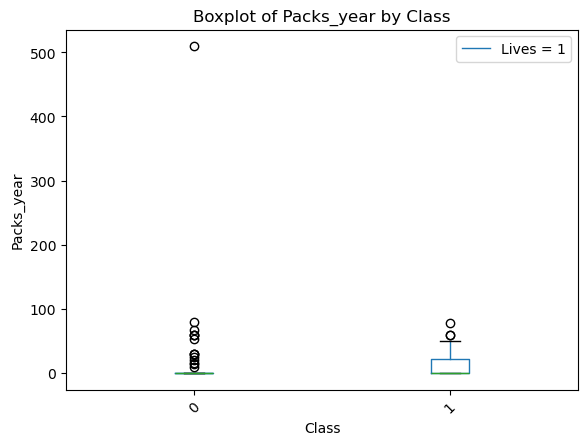

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filtering out rows where Packs_year is '?'
df_filtered = df[df['Packs_year'] != '?']

# Convert Packs_year column to numeric type
df_filtered['Packs_year'] = pd.to_numeric(df_filtered['Packs_year'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Packs_year', by='Class', grid=False)
plt.title('Boxplot of Packs_year by Class')
plt.xlabel('Class')
plt.ylabel('Packs_year')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 1000x600 with 0 Axes>

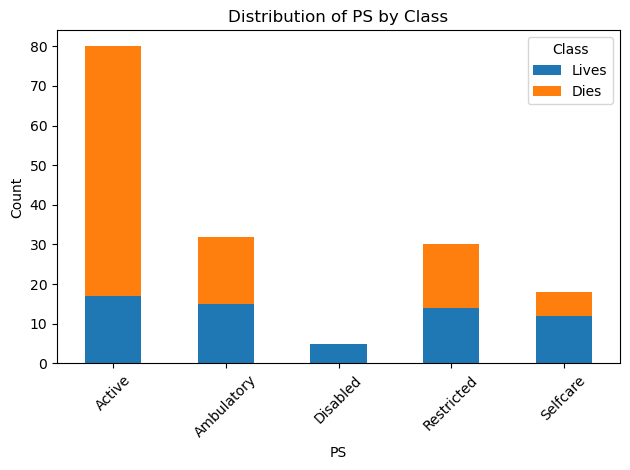

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where PS is NaN or '?'
df_filtered = df[(~df['PS'].isna()) & (df['PS'] != '?')]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
df_filtered.groupby(['PS', 'Class']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of PS by Class')
plt.xlabel('PS')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Lives', 'Dies'])
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

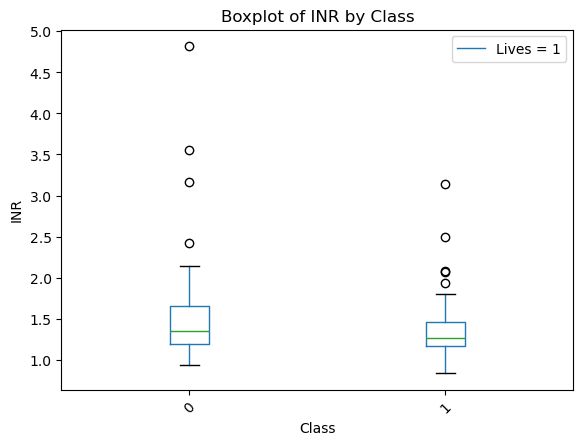

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where INR is NaN or '?'
df_filtered = df[(~df['INR'].isna()) & (df['INR'] != '?')]

# Convert INR column to numeric type
df_filtered['INR'] = pd.to_numeric(df_filtered['INR'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='INR', by='Class', grid=False)
plt.title('Boxplot of INR by Class')
plt.xlabel('Class')
plt.ylabel('INR')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

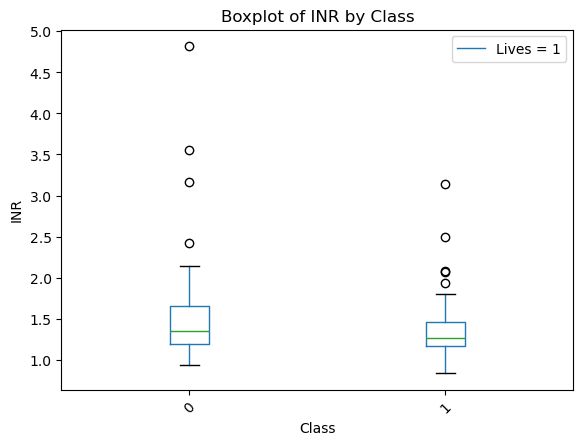

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where INR is NaN or '?'
df_filtered = df[(~df['INR'].isna()) & (df['INR'] != '?')]

# Convert INR column to numeric type
df_filtered['INR'] = pd.to_numeric(df_filtered['INR'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='INR', by='Class', grid=False)
plt.title('Boxplot of INR by Class')
plt.xlabel('Class')
plt.ylabel('INR')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

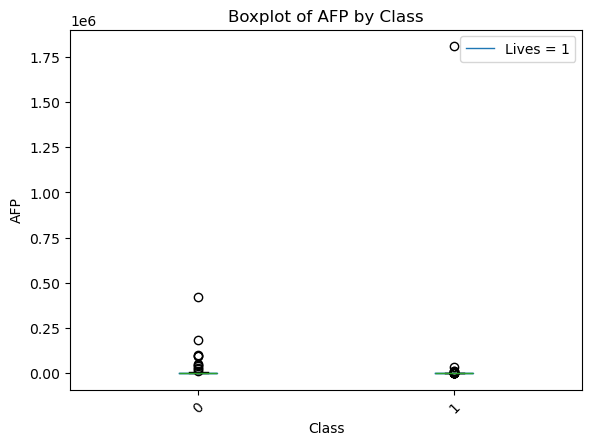

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where AFP is NaN or '?'
df_filtered = df[(~df['AFP'].isna()) & (df['AFP'] != '?')]

# Convert AFP column to numeric type
df_filtered['AFP'] = pd.to_numeric(df_filtered['AFP'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='AFP', by='Class', grid=False)
plt.title('Boxplot of AFP by Class')
plt.xlabel('Class')
plt.ylabel('AFP')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

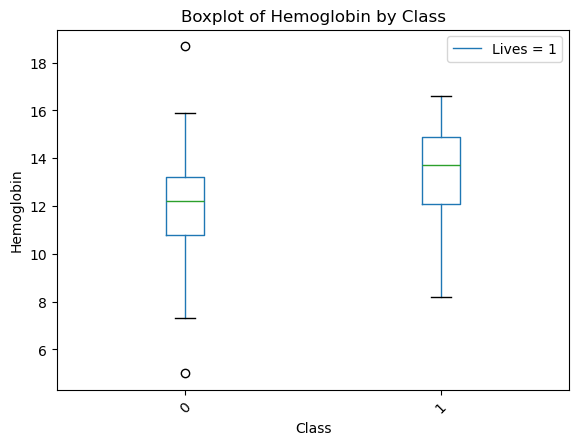

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Hemoglobin is NaN or '?'
df_filtered = df[(~df['Hemoglobin'].isna()) & (df['Hemoglobin'] != '?')]

# Convert Hemoglobin column to numeric type
df_filtered['Hemoglobin'] = pd.to_numeric(df_filtered['Hemoglobin'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Hemoglobin', by='Class', grid=False)
plt.title('Boxplot of Hemoglobin by Class')
plt.xlabel('Class')
plt.ylabel('Hemoglobin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

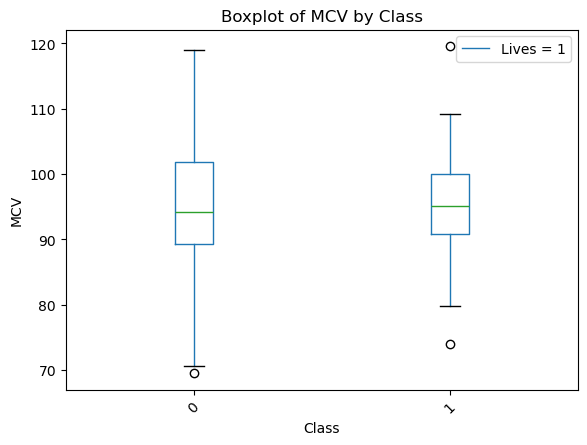

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where MCV is NaN or '?'
df_filtered = df[(~df['MCV'].isna()) & (df['MCV'] != '?')]

# Convert MCV column to numeric type
df_filtered['MCV'] = pd.to_numeric(df_filtered['MCV'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='MCV', by='Class', grid=False)
plt.title('Boxplot of MCV by Class')
plt.xlabel('Class')
plt.ylabel('MCV')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

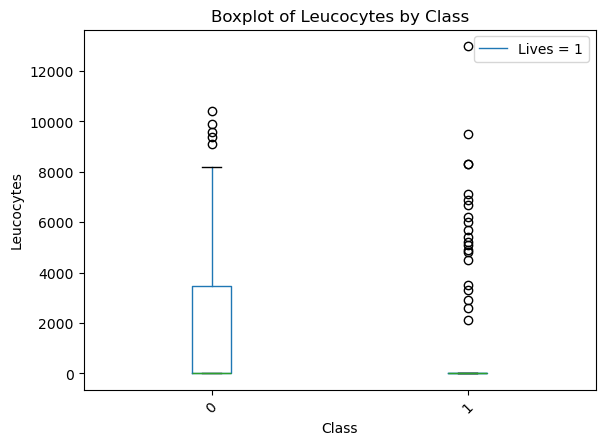

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Leucocytes is NaN or '?'
df_filtered = df[(~df['Leucocytes'].isna()) & (df['Leucocytes'] != '?')]

# Convert Leucocytes column to numeric type
df_filtered['Leucocytes'] = pd.to_numeric(df_filtered['Leucocytes'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Leucocytes', by='Class', grid=False)
plt.title('Boxplot of Leucocytes by Class')
plt.xlabel('Class')
plt.ylabel('Leucocytes')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

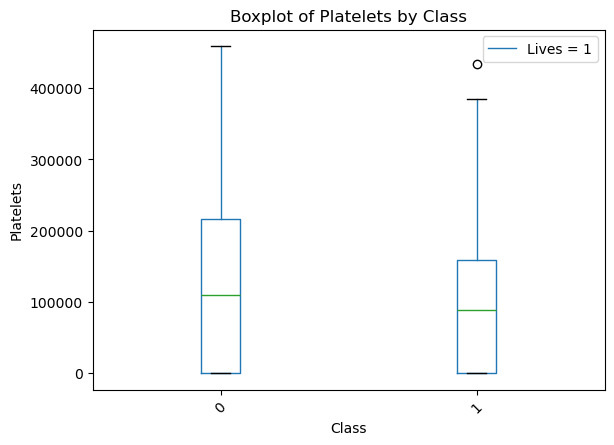

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Platelets is NaN or '?'
df_filtered = df[(~df['Platelets'].isna()) & (df['Platelets'] != '?')]

# Convert Platelets column to numeric type
df_filtered['Platelets'] = pd.to_numeric(df_filtered['Platelets'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Platelets', by='Class', grid=False)
plt.title('Boxplot of Platelets by Class')
plt.xlabel('Class')
plt.ylabel('Platelets')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

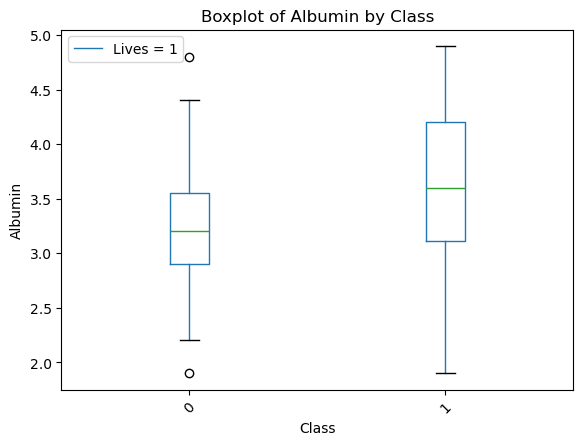

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Albumin is NaN or '?'
df_filtered = df[(~df[' Albumin'].isna()) & (df[' Albumin'] != '?')]

# Convert Albumin column to numeric type
df_filtered[' Albumin'] = pd.to_numeric(df_filtered[' Albumin'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column=' Albumin', by='Class', grid=False)
plt.title('Boxplot of Albumin by Class')
plt.xlabel('Class')
plt.ylabel('Albumin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()



<Figure size 800x600 with 0 Axes>

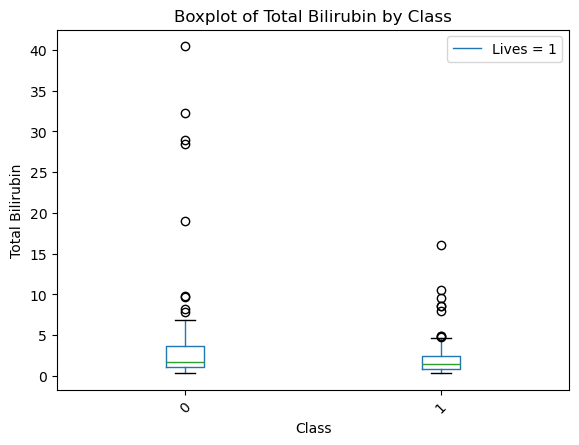

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Total_Bil is NaN or '?'
df_filtered = df[(~df['Total_Bil'].isna()) & (df['Total_Bil'] != '?')]

# Convert Total_Bil column to numeric type
df_filtered['Total_Bil'] = pd.to_numeric(df_filtered['Total_Bil'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Total_Bil', by='Class', grid=False)
plt.title('Boxplot of Total Bilirubin by Class')
plt.xlabel('Class')
plt.ylabel('Total Bilirubin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

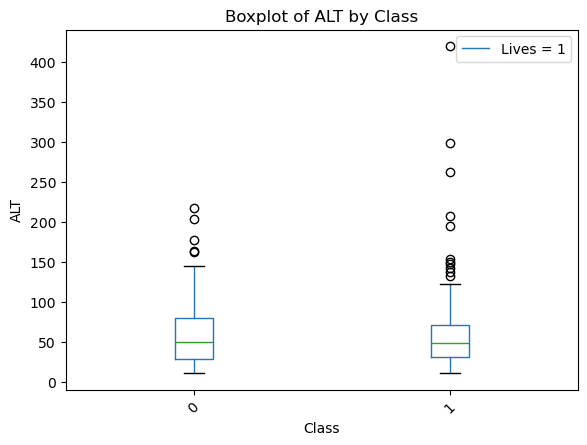

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where ALT is NaN or '?'
df_filtered = df[(~df['ALT'].isna()) & (df['ALT'] != '?')]

# Convert ALT column to numeric type
df_filtered['ALT'] = pd.to_numeric(df_filtered['ALT'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='ALT', by='Class', grid=False)
plt.title('Boxplot of ALT by Class')
plt.xlabel('Class')
plt.ylabel('ALT')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

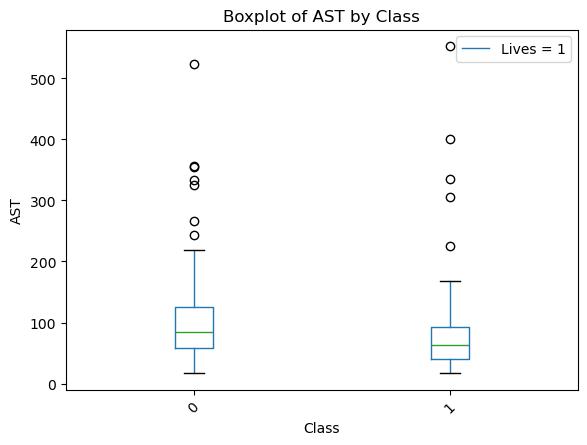

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where AST is NaN or '?'
df_filtered = df[(~df['AST'].isna()) & (df['AST'] != '?')]

# Convert AST column to numeric type
df_filtered['AST'] = pd.to_numeric(df_filtered['AST'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='AST', by='Class', grid=False)
plt.title('Boxplot of AST by Class')
plt.xlabel('Class')
plt.ylabel('AST')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

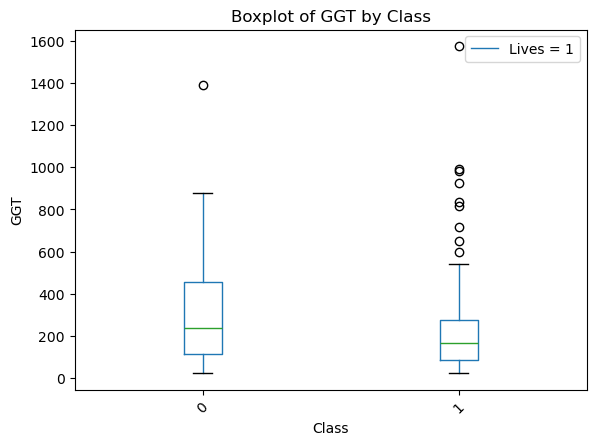

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where GGT is NaN or '?'
df_filtered = df[(~df['GGT'].isna()) & (df['GGT'] != '?')]

# Convert GGT column to numeric type
df_filtered['GGT'] = pd.to_numeric(df_filtered['GGT'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='GGT', by='Class', grid=False)
plt.title('Boxplot of GGT by Class')
plt.xlabel('Class')
plt.ylabel('GGT')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

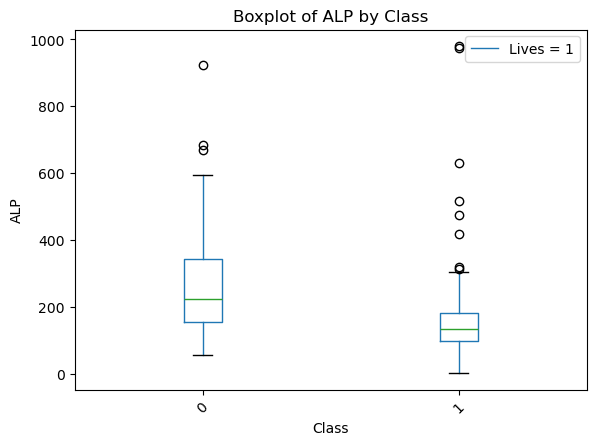

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where ALP is NaN or '?'
df_filtered = df[(~df['ALP'].isna()) & (df['ALP'] != '?')]

# Convert ALP column to numeric type
df_filtered['ALP'] = pd.to_numeric(df_filtered['ALP'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='ALP', by='Class', grid=False)
plt.title('Boxplot of ALP by Class')
plt.xlabel('Class')
plt.ylabel('ALP')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

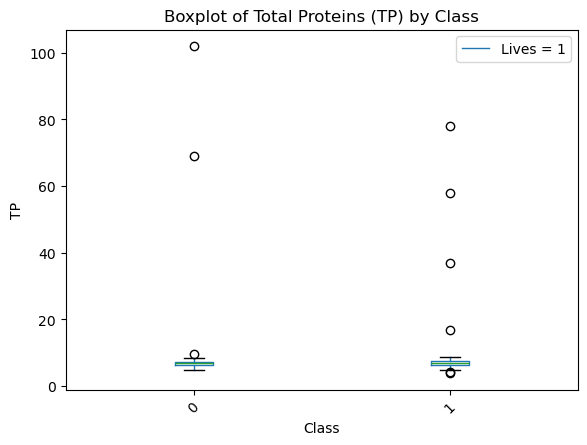

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where TP is NaN or '?'
df_filtered = df[(~df['TP'].isna()) & (df['TP'] != '?')]

# Convert TP column to numeric type
df_filtered['TP'] = pd.to_numeric(df_filtered['TP'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='TP', by='Class', grid=False)
plt.title('Boxplot of Total Proteins (TP) by Class')
plt.xlabel('Class')
plt.ylabel('TP')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

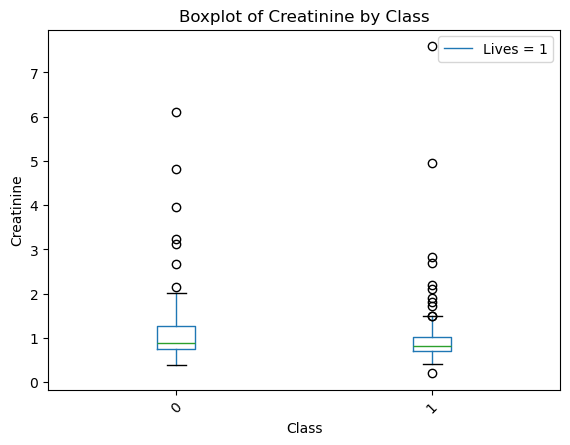

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Creatinine is NaN or '?'
df_filtered = df[(~df['Creatinine'].isna()) & (df['Creatinine'] != '?')]

# Convert Creatinine column to numeric type
df_filtered['Creatinine'] = pd.to_numeric(df_filtered['Creatinine'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Creatinine', by='Class', grid=False)
plt.title('Boxplot of Creatinine by Class')
plt.xlabel('Class')
plt.ylabel('Creatinine')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

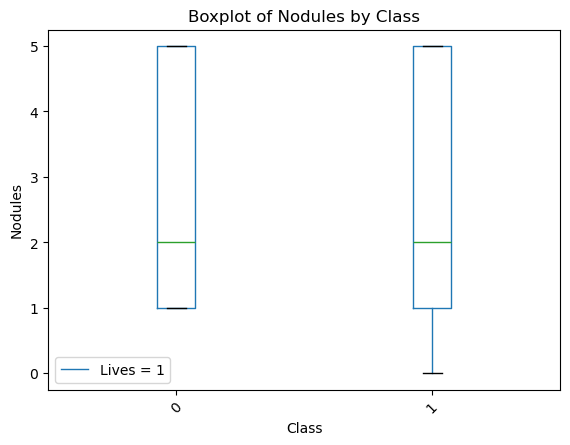

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Nodules is NaN or '?'
df_filtered = df[(~df['Nodules'].isna()) & (df['Nodules'] != '?')]

# Convert Nodules column to numeric type
df_filtered['Nodules'] = pd.to_numeric(df_filtered['Nodules'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Nodules', by='Class', grid=False)
plt.title('Boxplot of Nodules by Class')
plt.xlabel('Class')
plt.ylabel('Nodules')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

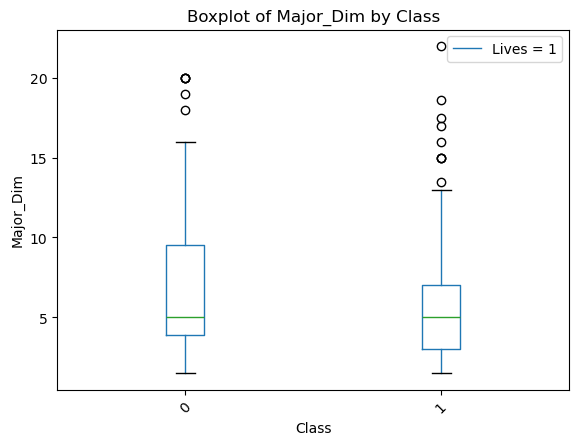

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Major_Dim is NaN or '?'
df_filtered = df[(~df['Major_Dim'].isna()) & (df['Major_Dim'] != '?')]

# Convert Major_Dim column to numeric type
df_filtered['Major_Dim'] = pd.to_numeric(df_filtered['Major_Dim'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Major_Dim', by='Class', grid=False)
plt.title('Boxplot of Major_Dim by Class')
plt.xlabel('Class')
plt.ylabel('Major_Dim')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

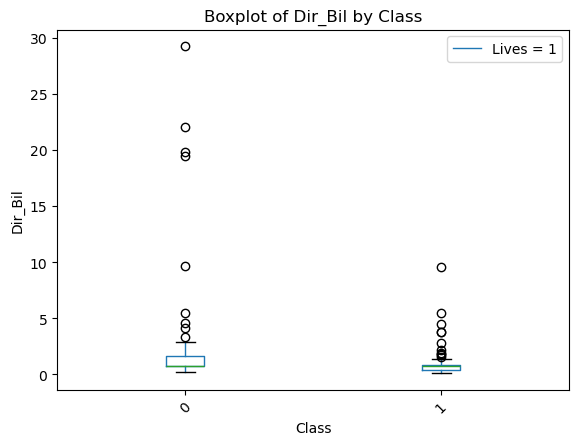

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Dir_Bil is NaN or '?'
df_filtered = df[(~df['Dir_Bil'].isna()) & (df['Dir_Bil'] != '?')]

# Convert Dir_Bil column to numeric type
df_filtered['Dir_Bil'] = pd.to_numeric(df_filtered['Dir_Bil'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Dir_Bil', by='Class', grid=False)
plt.title('Boxplot of Dir_Bil by Class')
plt.xlabel('Class')
plt.ylabel('Dir_Bil')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

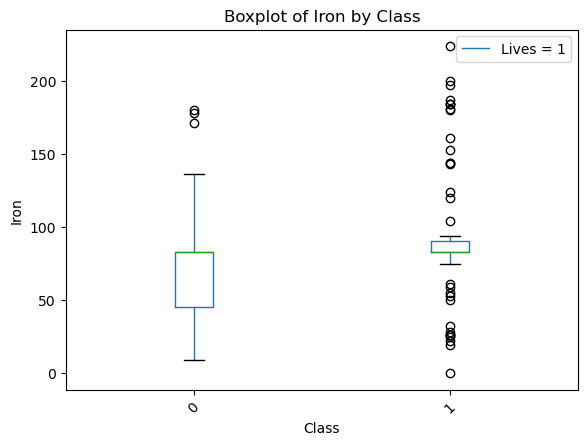

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Iron is NaN or '?'
df_filtered = df[(~df['Iron'].isna()) & (df['Iron'] != '?')]

# Convert Iron column to numeric type
df_filtered['Iron'] = pd.to_numeric(df_filtered['Iron'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Iron', by='Class', grid=False)
plt.title('Boxplot of Iron by Class')
plt.xlabel('Class')
plt.ylabel('Iron')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

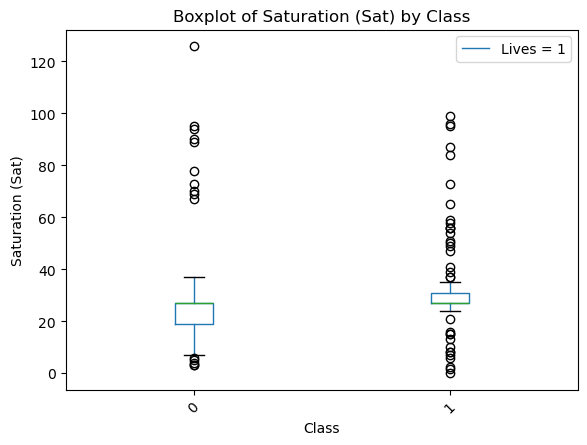

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Sat is NaN or '?'
df_filtered = df[(~df['Sat'].isna()) & (df['Sat'] != '?')]

# Convert Sat column to numeric type
df_filtered['Sat'] = pd.to_numeric(df_filtered['Sat'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Sat', by='Class', grid=False)
plt.title('Boxplot of Saturation (Sat) by Class')
plt.xlabel('Class')
plt.ylabel('Saturation (Sat)')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

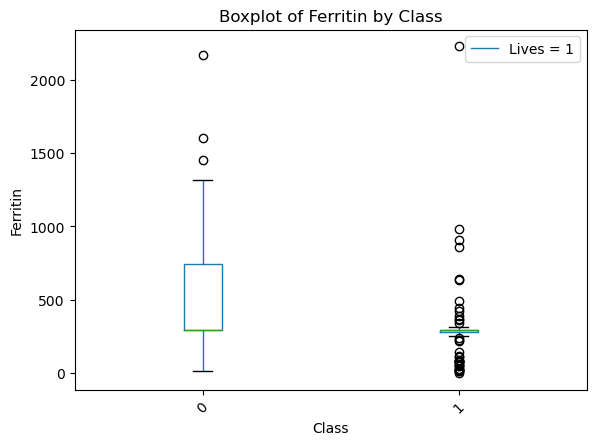

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter out rows where Ferritin is NaN or '?'
df_filtered = df[(~df['Ferritin'].isna()) & (df['Ferritin'] != '?')]

# Convert Ferritin column to numeric type
df_filtered['Ferritin'] = pd.to_numeric(df_filtered['Ferritin'])

# Plotting the boxplot
plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Ferritin', by='Class', grid=False)
plt.title('Boxplot of Ferritin by Class')
plt.xlabel('Class')
plt.ylabel('Ferritin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()
